<a href="https://colab.research.google.com/github/rajatktiwari/Deep-Learning/blob/main/Google_Stock_Prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
train_dataset = pd.read_csv('/content/drive/MyDrive/Google Colab /Neural Networks/CNN/DATA SETS/Google_Stock_Price_Train.csv')

In [3]:
training_set = train_dataset.iloc[:,1:2].values #creating the training data 


In [4]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_sc = sc.fit_transform(training_set)

In [5]:
#Creating the data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60,1258):
  X_train.append(training_set_sc[i-60:i,0])
  y_train.append(training_set_sc[i,0])
X_train, y_train = np.array(X_train),np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))  #Reshaping

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
regressor = Sequential()


In [42]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True)) #2nd LSTM LAYER
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=False)) #3rd Sequence layer
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

regressor.compile(optimizer='Adam', loss = 'mean_squared_error')


In [43]:
regressor.fit(X_train,y_train, epochs=100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0278
Epoch 2/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0069
Epoch 3/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0059
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0058
Epoch 5/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0063
Epoch 6/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0042
Epoch 9/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 2s 61ms/step - loss: 0.0045
Epoch 13/100
38/38 [=====

In [44]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Google Colab /Neural Networks/CNN/DATA SETS/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [45]:
dataset_total = pd.concat((train_dataset['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


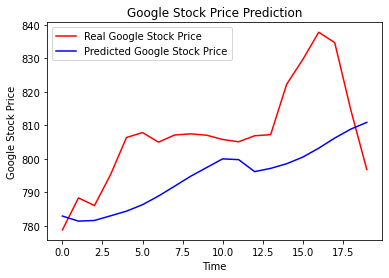

In [46]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
